In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.graph_objects as go

from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")

In [2]:
Direct_Marketing=pd.read_csv("https://raw.githubusercontent.com/benvictoria17/MachineLearning/master/dataset/DirectMarketing.csv")
df=Direct_Marketing.copy()
df.head(25)

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,Old,Female,Own,Single,Far,47500,0,High,6,755
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304
5,Young,Male,Own,Married,Close,30400,0,Low,6,495
6,Middle,Female,Rent,Single,Close,48100,0,Medium,12,782
7,Middle,Male,Own,Single,Close,68400,0,High,18,1155
8,Middle,Female,Own,Married,Close,51900,3,Low,6,158
9,Old,Male,Own,Married,Far,80700,0,NaN,18,3034


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          1000 non-null   object
 1   Gender       1000 non-null   object
 2   OwnHome      1000 non-null   object
 3   Married      1000 non-null   object
 4   Location     1000 non-null   object
 5   Salary       1000 non-null   int64 
 6   Children     1000 non-null   int64 
 7   History      697 non-null    object
 8   Catalogs     1000 non-null   int64 
 9   AmountSpent  1000 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [4]:
df.dtypes

Age            object
Gender         object
OwnHome        object
Married        object
Location       object
Salary          int64
Children        int64
History        object
Catalogs        int64
AmountSpent     int64
dtype: object

In [5]:
df.shape

(1000, 10)

In [6]:
df[df.duplicated() == True]

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent


In [7]:
{column: list(df[column].unique()) for column in df.select_dtypes('object').columns}

{'Age': ['Old', 'Middle', 'Young'],
 'Gender': ['Female', 'Male'],
 'OwnHome': ['Own', 'Rent'],
 'Married': ['Single', 'Married'],
 'Location': ['Far', 'Close'],
 'History': ['High', 'Low', 'Medium', nan]}

In [8]:
df.isnull().values.any()

True

In [9]:
df.isnull().sum()

Age              0
Gender           0
OwnHome          0
Married          0
Location         0
Salary           0
Children         0
History        303
Catalogs         0
AmountSpent      0
dtype: int64

In [10]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(df)

,Total,Percent
History,303,30.3
Age,0,0.0
Gender,0,0.0
OwnHome,0,0.0
Married,0,0.0
Location,0,0.0
Salary,0,0.0
Children,0,0.0
Catalogs,0,0.0
AmountSpent,0,0.0


In [11]:
df.corr()

,Salary,Children,Catalogs,AmountSpent
Salary,1.000000,0.049663,0.183551,0.699596
Children,0.049663,1.000000,-0.113455,-0.222308
Catalogs,0.183551,-0.113455,1.000000,0.472650
AmountSpent,0.699596,-0.222308,0.472650,1.000000


Correlation Matrix


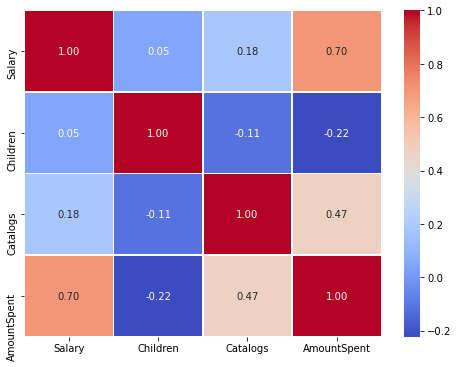

In [12]:
print("Correlation Matrix")
plt.rcParams['figure.figsize']=(8,6)
sns.heatmap(df.corr(),cmap='coolwarm',linewidths=.5,fmt=".2f",annot = True);

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,1000.0,56103.900,30616.314826,10100.0,29975.00,53700.0,77025.0,168800.0
Children,1000.0,0.934,1.051070,0.0,0.00,1.0,2.0,3.0
Catalogs,1000.0,14.682,6.622895,6.0,6.00,12.0,18.0,24.0
AmountSpent,1000.0,1216.770,961.068613,38.0,488.25,962.0,1688.5,6217.0


In [14]:
df_Age=df['Age'].value_counts().to_frame().reset_index().rename(columns={'index':'Age','Age':'count'})
df_Age

,Age,count
0,Middle,508
1,Young,287
2,Old,205


In [15]:
df_Age=df['Age'].value_counts().to_frame().reset_index().rename(columns={'index':'Age','Age':'count'})


fig = go.Figure([go.Pie(labels=df_Age['Age'], values=df_Age['count'], pull=[0.2,0,0],hole=0.4)])

fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=12,insidetextorientation='radial')

fig.update_layout(title="Age Distribution",title_x=0.5)
fig.show()

In [16]:
df_Age=df['Age'].value_counts().to_frame().reset_index().rename(columns={'index':'Age','Age':'count'})

fig = go.Figure(go.Bar(
    x=df_Age['Age'],y=df_Age['count'],
    marker={'color': df_Age['count'], 
    'colorscale': 'Viridis'},  
    text=df_Age['count'],
    textposition = "outside",
))
fig.update_layout(title_text='Age Distribution',xaxis_title="Age",yaxis_title="Count ",title_x=0.5)
fig.show()

In [17]:
df_Age_Salary=df.groupby(by =['Age'])['Salary'].mean().to_frame().reset_index().rename(columns={'Salary':'AVG_Salary'})
df_Age_AmountSpent=df.groupby(by =['Age'])['AmountSpent'].mean().to_frame().reset_index().rename(columns={'Age':'Age1','AmountSpent':'AVG_AmountSpent'})
result = pd.concat([df_Age_Salary,df_Age_AmountSpent], axis=1)
result.drop(['Age1'],inplace=True,axis=1)
result["AVG_Salary"]=result["AVG_Salary"].map(lambda x:round(x,2))
result["AVG_AmountSpent"]=result["AVG_AmountSpent"].map(lambda x:round(x,2))
result

,Age,AVG_Salary,AVG_AmountSpent
0,Middle,72036.42,1501.69
1,Old,56365.85,1432.13
2,Young,27715.68,558.62


In [18]:
df_Age_Salary=df.groupby(by =['Age'])['Salary'].mean().to_frame().reset_index().rename(columns={'Salary':'AVG_Salary'})
df_Age_AmountSpent=df.groupby(by =['Age'])['AmountSpent'].mean().to_frame().reset_index().rename(columns={'Age':'Age1','AmountSpent':'AVG_AmountSpent'})
result = pd.concat([df_Age_Salary,df_Age_AmountSpent], axis=1)
result.drop(['Age1'],inplace=True,axis=1)
result["AVG_Salary"]=result["AVG_Salary"].map(lambda x:round(x,2))
result["AVG_AmountSpent"]=result["AVG_AmountSpent"].map(lambda x:round(x,2))


fig = make_subplots(rows=2, cols=1,
                   subplot_titles=("Age AVG Salary ",
                                   "Age AVG Amount Spent " ))  # Subplot titles
                                  

fig.add_trace(go.Bar(
    x=result['Age'],y=result['AVG_Salary'],
    name="Mean Salary",
    marker={'color': result['AVG_Salary'], 
    'colorscale': 'fall'},  
    text=result['AVG_Salary'],
    textposition = "inside"),
    row=1, col=1         
)
fig.add_trace(go.Bar(
    x=result['Age'],y=result['AVG_AmountSpent'],
    name="Mean Amount Spent",
    marker={'color': result['AVG_AmountSpent'], 
    'colorscale': 'fall'},  
    text=result['AVG_AmountSpent'],
    textposition = "inside"),
    row=2, col=1         
)

fig.update_layout(title = "Age ",title_x=0.5)
fig.show()

In [19]:
# Scatter plot - Category

fig = px.scatter(df, x='Salary', y='AmountSpent',trendline="ols",
                 color='Age') # Added color to basic scatter
fig.update_layout(title='Age With Salary Vs Amount Spent ',xaxis_title="Salary",yaxis_title="Amount Spent",title_x=0.5)
fig.show()

In [20]:
df_Gender=df['Gender'].value_counts().to_frame().reset_index().rename(columns={'index':'Gender','Gender':'count'})
df_Gender

,Gender,count
0,Female,506
1,Male,494


In [21]:
fig = go.Figure(go.Bar(
    x=df_Gender['Gender'],y=df_Gender['count'],
    marker={'color': df_Gender['count'], 
    'colorscale': 'Viridis'},  
    text=df_Gender['count'],
    textposition = "outside",
))
fig.update_layout(title_text='Gender Distribution',xaxis_title="Gender",yaxis_title="Count ",title_x=0.5)
fig.show()

In [22]:
df_Gender_Salary=df.groupby(by =['Gender'])['Salary'].mean().to_frame().reset_index().rename(columns={'Salary':'AVG_Salary'})
df_Gender_AmountSpent=df.groupby(by =['Gender'])['AmountSpent'].mean().to_frame().reset_index().rename(columns={'Gender':'Gender1','AmountSpent':'AVG_AmountSpent'})
result = pd.concat([df_Gender_Salary,df_Gender_AmountSpent], axis=1)
result.drop(['Gender1'],inplace=True,axis=1)
result["AVG_Salary"]=result["AVG_Salary"].map(lambda x:round(x,2))
result["AVG_AmountSpent"]=result["AVG_AmountSpent"].map(lambda x:round(x,2))


fig = make_subplots(rows=2, cols=1,
                   subplot_titles=("Gender AVG Salary ",
                                   "Gender AVG Amount Spent " ))  # Subplot titles
                                  

fig.add_trace(go.Bar(
    x=result['Gender'],y=result['AVG_Salary'],
    name="Mean Salary",
    marker={'color': result['AVG_Salary'], 
    'colorscale': 'fall'},  
    text=result['AVG_Salary'],
    textposition = "inside"),
    row=1, col=1         
)
fig.add_trace(go.Bar(
    x=result['Gender'],y=result['AVG_AmountSpent'],
    name="Mean Amount Spent",
    marker={'color': result['AVG_AmountSpent'], 
    'colorscale': 'fall'},  
    text=result['AVG_AmountSpent'],
    textposition = "inside"),
    row=2, col=1         
)

fig.update_layout(title = "Gender ",title_x=0.5)
fig.show()

In [23]:
fig = px.scatter(df, x='Salary', y='AmountSpent',trendline="ols",
                 color='Gender') # Added color to basic scatter
fig.update_layout(title='Gender With Salary Vs Amount Spent ',xaxis_title="Salary",yaxis_title="Amount Spent",title_x=0.5)
fig.show()

In [24]:
df_G_and_A=df.groupby(by =['Gender','Age'])['Married'].count().to_frame().reset_index().rename(columns={'Gender':'Gender','Age':'Age','Married':'count'})
df_G_and_A

,Gender,Age,count
0,Female,Middle,206
1,Female,Old,129
2,Female,Young,171
3,Male,Middle,302
4,Male,Old,76
5,Male,Young,116


In [25]:
df_G_and_A=df.groupby(by =['Gender','Age'])['Married'].count().to_frame().reset_index().rename(columns={'Gender':'Gender','Age':'Age','Married':'count'})

fig = px.bar(df_G_and_A, x="Age", y="count",color="Gender",barmode="group",
             
             )
fig.update_layout(title_text='Age Count With Gender',title_x=0.5,yaxis_title="Count",
                 )
fig.show()

In [26]:
df_G_and_A=df.groupby(by =['Gender','Age'])['AmountSpent'].mean().to_frame().reset_index().rename(columns={'AmountSpent':'AVG_AmountSpent'})
df_G_and_A["AVG_AmountSpent"]=df_G_and_A["AVG_AmountSpent"].map(lambda x:round(x,2))
df_G_and_A

,Gender,Age,AVG_AmountSpent
0,Female,Middle,1301.34
1,Female,Old,1279.31
2,Female,Young,501.26
3,Male,Middle,1638.35
4,Male,Old,1691.51
5,Male,Young,643.19


In [27]:
df_G_and_A=df.groupby(by =['Gender','Age'])['AmountSpent'].mean().to_frame().reset_index().rename(columns={'AmountSpent':'AVG_AmountSpent'})
df_G_and_A["AVG_AmountSpent"]=df_G_and_A["AVG_AmountSpent"].map(lambda x:round(x,2))

fig = px.bar(df_G_and_A, x="Age", y="AVG_AmountSpent",color="Gender",barmode="group",
             
             )
fig.update_layout(title_text='Age Amount Spent With Gender,Age',title_x=0.5,yaxis_title="Amount Spent",
                 )
fig.show()

In [28]:
df_age_gender_agg=df.groupby(by=["Age","Gender"])['AmountSpent'].agg(["min","mean","max"])
df_age_gender_agg

min         mean   max
Age    Gender                        
Middle Female  158  1301.339806  5830
       Male    157  1638.354305  5878
Old    Female   65  1279.310078  5564
       Male    297  1691.513158  6217
Young  Female   47   501.257310  3688
       Male     38   643.189655  1692

In [29]:
df_G_and_A_AVG=df.groupby(by =['Gender','Age'])['AmountSpent'].mean().to_frame().reset_index().rename(columns={'Gender':'Gender','Age':'Age','AmountSpent':'AVG_AmountSpent'})
df_G_and_A_Max=df.groupby(by =['Gender','Age'])['AmountSpent'].max().to_frame().reset_index().rename(columns={'Gender':'Gender1','Age':'Age1','AmountSpent':'Max_AmountSpent'})
df_G_and_A_Min=df.groupby(by =['Gender','Age'])['AmountSpent'].min().to_frame().reset_index().rename(columns={'Gender':'Gender2','Age':'Age2','AmountSpent':'Min_AmountSpent'})
df_G_and_A_Count=df.groupby(by =['Gender','Age'])['AmountSpent'].count().to_frame().reset_index().rename(columns={'Gender':'Gender3','Age':'Age3','AmountSpent':'Count'})
result = pd.concat([df_G_and_A_AVG, df_G_and_A_Max,df_G_and_A_Min,df_G_and_A_Count], axis=1)
result.drop(['Gender1','Gender2','Gender3','Age1','Age2','Age3'],inplace=True,axis=1)
result["AVG_AmountSpent"]=result["AVG_AmountSpent"].map(lambda x:round(x,2))
result["Gender_Age"]=result["Gender"]+" "+result["Age"]
result.drop(['Gender','Age'],inplace=True,axis=1)
result

,AVG_AmountSpent,Max_AmountSpent,Min_AmountSpent,Count,Gender_Age
0,1301.34,5830,158,206,Female Middle
1,1279.31,5564,65,129,Female Old
2,501.26,3688,47,171,Female Young
3,1638.35,5878,157,302,Male Middle
4,1691.51,6217,297,76,Male Old
5,643.19,1692,38,116,Male Young


In [30]:
df_G_and_A_AVG=df.groupby(by =['Gender','Age'])['AmountSpent'].mean().to_frame().reset_index().rename(columns={'Gender':'Gender','Age':'Age','AmountSpent':'AVG_AmountSpent'})
df_G_and_A_Max=df.groupby(by =['Gender','Age'])['AmountSpent'].max().to_frame().reset_index().rename(columns={'Gender':'Gender1','Age':'Age1','AmountSpent':'Max_AmountSpent'})
df_G_and_A_Min=df.groupby(by =['Gender','Age'])['AmountSpent'].min().to_frame().reset_index().rename(columns={'Gender':'Gender2','Age':'Age2','AmountSpent':'Min_AmountSpent'})
df_G_and_A_Count=df.groupby(by =['Gender','Age'])['AmountSpent'].count().to_frame().reset_index().rename(columns={'Gender':'Gender3','Age':'Age3','AmountSpent':'Count'})
result = pd.concat([df_G_and_A_AVG, df_G_and_A_Max,df_G_and_A_Min,df_G_and_A_Count], axis=1)
result.drop(['Gender1','Gender2','Gender3','Age1','Age2','Age3'],inplace=True,axis=1)
result["AVG_AmountSpent"]=result["AVG_AmountSpent"].map(lambda x:round(x,2))
result["Gender_Age"]=result["Gender"]+" "+result["Age"]
result.drop(['Gender','Age'],inplace=True,axis=1)

fig = make_subplots(rows=4, cols=1,
                   subplot_titles=(" Mean Amount Spent",
                                   " Min Amount Spent",
                                   " Max Amount Spent",
                                   " Count "))  # Subplot titles

fig.add_trace(go.Bar(
    x=result['Gender_Age'],y=result['AVG_AmountSpent'],
    name="Mean",
    marker={'color': result['AVG_AmountSpent'], 
    'colorscale': 'fall'},  
    text=result['AVG_AmountSpent'],
    textposition = "inside"),
    row=1, col=1         
)
fig.add_trace(go.Bar(
    x=result['Gender_Age'],y=result['Min_AmountSpent'],
    name="Min",
    marker={'color': result['Min_AmountSpent'], 
    'colorscale': 'fall'},  
    text=result['Min_AmountSpent'],
    textposition = "inside"),
    row=2, col=1         
)
fig.add_trace(go.Bar(
    x=result['Gender_Age'],y=result['Max_AmountSpent'],
    name="Max",
    marker={'color': result['Max_AmountSpent'], 
    'colorscale': 'fall'},  
    text=result['Max_AmountSpent'],
    textposition = "inside"),
    row=3, col=1           
)
fig.add_trace(go.Bar(
    x=result['Gender_Age'],y=result['Count'],
    name="Count",
    marker={'color': result['Count'], 
    'colorscale': 'fall'},  
    text=result['Count'],
    textposition = "inside"),
    row=4, col=1           
)
fig.update_layout(title = "Gender Age With Amount Spent",title_x=0.5)
fig.update_xaxes(
        tickangle = 0,
        )
fig.show()

In [31]:
df_age_gender_agg=df.groupby(by=["Age","Gender"])['Salary'].agg(["min","mean","max"])
df_age_gender_agg

min          mean     max
Age    Gender                             
Middle Female  25300  65787.864078  135700
       Male    34200  76298.675497  140700
Old    Female  10100  50213.953488  128700
       Male    15400  66807.894737  168800
Young  Female  10200  25485.380117   79400
       Male    10200  31003.448276   80700